<a href="https://colab.research.google.com/github/Rugved-Pandit/dogs-vs-cats-image-classification/blob/main/dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#dogs vs cats image classification using resnet model

In [2]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#if you are using gpu then you can use this to check it

%tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
batch_size = 32
img_size = 320

In [5]:
#loading dataset. change the path to your dataset dir. 
#i have already removed some bad images which were causing problems so dataset size is only 24.5k

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'your-dataset-path',
    image_size = (img_size, img_size),
    batch_size = batch_size,
    seed=111,
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="training",
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'your-dataset-path',
    image_size = (img_size, img_size),
    batch_size = 1,
    seed=111,
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="validation",
)

print(train_ds.class_names)

Found 24437 files belonging to 2 classes.
Using 19550 files for training.
Found 24437 files belonging to 2 classes.
Using 4887 files for validation.
['Cat', 'Dog']


In [6]:
#normalize the dataset
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds_train = train_ds.map(lambda xx, yy: (normalization_layer(xx), yy))
normalized_ds_val = val_ds.map(lambda xx, yy: (normalization_layer(xx), yy))

In [9]:
#the resnet model

inputs = tf.keras.Input(shape=(img_size, img_size, 3))

###layer1
m = layers.Conv2D(32, 5)(inputs)
m = tf.keras.activations.relu(m)
m = layers.MaxPool2D((2, 2))(m)

###res block
res_i = layers.Conv2D(64, 3, padding='same')(m)
m = tf.keras.activations.relu(res_i)

m = layers.Conv2D(64, 3, padding='same')(m)
m = tf.keras.activations.relu(m)

m = layers.Conv2D(64, 3, padding='same')(m)
m = m + res_i
m = tf.keras.activations.relu(m)
m = layers.MaxPool2D((2, 2))(m)
###res block end

###res block
res_i = layers.Conv2D(64, 3, padding='same')(m)
m = tf.keras.activations.relu(res_i)

m = layers.Conv2D(64, 3, padding='same')(m)
m = tf.keras.activations.relu(m)

m = layers.Conv2D(64, 3, padding='same')(m)
m = m + res_i
m = tf.keras.activations.relu(m)
m = layers.MaxPool2D((2, 2))(m)
###res block end

###res block
res_i = layers.Conv2D(64, 3, padding='same')(m)
m = tf.keras.activations.relu(res_i)

m = layers.Conv2D(64, 3, padding='same')(m)
m = tf.keras.activations.relu(m)

m = layers.Conv2D(64, 3, padding='same')(m)
m = m + res_i
m = tf.keras.activations.relu(m)
m = layers.MaxPool2D((2, 2))(m)
###res block end

###res block
res_i = layers.Conv2D(64, 3, padding='same')(m)
m = tf.keras.activations.relu(res_i)

m = layers.Conv2D(64, 3, padding='same')(m)
m = tf.keras.activations.relu(m)

m = layers.Conv2D(64, 3, padding='same')(m)
m = m + res_i
m = tf.keras.activations.relu(m)
m = layers.MaxPool2D((2, 2))(m)
###res block end

###res block
res_i = layers.Conv2D(64, 3, padding='same')(m)
m = tf.keras.activations.relu(res_i)

m = layers.Conv2D(64, 3, padding='same')(m)
m = tf.keras.activations.relu(m)

m = layers.Conv2D(64, 3, padding='same')(m)
m = m + res_i
m = tf.keras.activations.relu(m)
m = layers.MaxPool2D((2, 2))(m)
###res block end

m = layers.Flatten()(m)
m = layers.Dense(128, activation='relu')(m)
m = layers.Dropout(0.3)(m)

outputs = layers.Dense(2)(m)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 316, 316, 32  2432        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 tf.nn.relu_16 (TFOpLambda)     (None, 316, 316, 32  0           ['conv2d_16[0][0]']              
                                )                                                           

In [10]:
#compile and fit the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007), loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(normalized_ds_train, validation_data=normalized_ds_val, epochs=10)

Epoch 1/10
611/611 [==============================] - 336s 547ms/step - loss: 0.6905 - accuracy: 0.5247 - val_loss: 0.6861 - val_accuracy: 0.5388
Epoch 2/10
611/611 [==============================] - 333s 544ms/step - loss: 0.6731 - accuracy: 0.5785 - val_loss: 0.6346 - val_accuracy: 0.6302
Epoch 3/10
611/611 [==============================] - 334s 545ms/step - loss: 0.5933 - accuracy: 0.6794 - val_loss: 0.5146 - val_accuracy: 0.7479
Epoch 4/10
611/611 [==============================] - 333s 544ms/step - loss: 0.4901 - accuracy: 0.7641 - val_loss: 0.4388 - val_accuracy: 0.7962
Epoch 5/10
611/611 [==============================] - 333s 543ms/step - loss: 0.3985 - accuracy: 0.8216 - val_loss: 0.3919 - val_accuracy: 0.8253
Epoch 6/10
611/611 [==============================] - 333s 543ms/step - loss: 0.3331 - accuracy: 0.8566 - val_loss: 0.3475 - val_accuracy: 0.8523
Epoch 7/10
611/611 [==============================] - 332s 543ms/step - loss: 0.2787 - accuracy: 0.8803 - val_loss: 0.3263 -

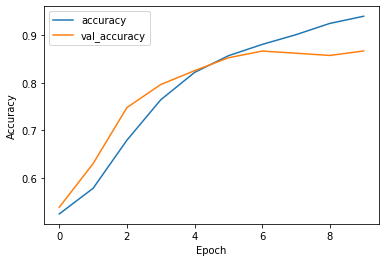

In [11]:
#plotting the metrics

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='best')

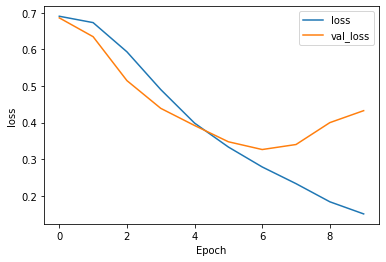

In [12]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
# plt.ylim([0, 2.3])
plt.legend(loc='best')

In [14]:
#save the model
# model.save('your-path/dogs-vs-cats.h5')

#if you want to convert the model to tflite version for future use
# tflite_model = tf.lite.TFLiteConverter.from_keras_model(model).convert()
# open("your-path/dogs-vs-cats-tflite.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpzb5z2_wm/assets


2689312